In [3]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [21]:
Iris_df=pd.read_csv('Iris.csv')
Iris_df.sample(n=10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
130,7.4,2.8,6.1,1.9,Iris-virginica
59,5.2,2.7,3.9,1.4,Iris-versicolor
30,4.8,3.1,1.6,0.2,Iris-setosa
96,5.7,2.9,4.2,1.3,Iris-versicolor
149,5.9,3.0,5.1,1.8,Iris-virginica
124,6.7,3.3,5.7,2.1,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
112,6.8,3.0,5.5,2.1,Iris-virginica
39,5.1,3.4,1.5,0.2,Iris-setosa
105,7.6,3.0,6.6,2.1,Iris-virginica


In [5]:
Iris_df.shape

(150, 5)

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [22]:
Iris_df.fillna(Iris_df.median(), inplace=True)
Iris_df.head(5)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<span style="color:blue">   *There are no missing values in the dataset.*   </span>

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [23]:
le=LabelEncoder()
Iris_df['Class']=le.fit_transform(Iris_df['Class'])
Iris_df.sample(n=10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
132,6.4,2.8,5.6,2.2,2
35,5.0,3.2,1.2,0.2,0
106,4.9,2.5,4.5,1.7,2
102,7.1,3.0,5.9,2.1,2
31,5.4,3.4,1.5,0.4,0
67,5.8,2.7,4.1,1.0,1
60,5.0,2.0,3.5,1.0,1
92,5.8,2.6,4.0,1.2,1
25,5.0,3.0,1.6,0.2,0
75,6.6,3.0,4.4,1.4,1


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [24]:
Iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [ ]:
sns.heatmap(Iris_df.corr(),annot=True,cmap='inferno')

<span style="color:blue">   *Since data is already indexed, we remove Id column from dataset.*   </span>//
<span style="color:blue">   *Rest all features has high correlation with species, so we keep it.*   </span>

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [26]:
Iris_df.var()

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

<span style="color:blue">   *All independent variables are having variance above 0.1, hence they will be having some influence on classification.*   </span>

## Question 6

*Plot the scatter matrix for all the variables.*

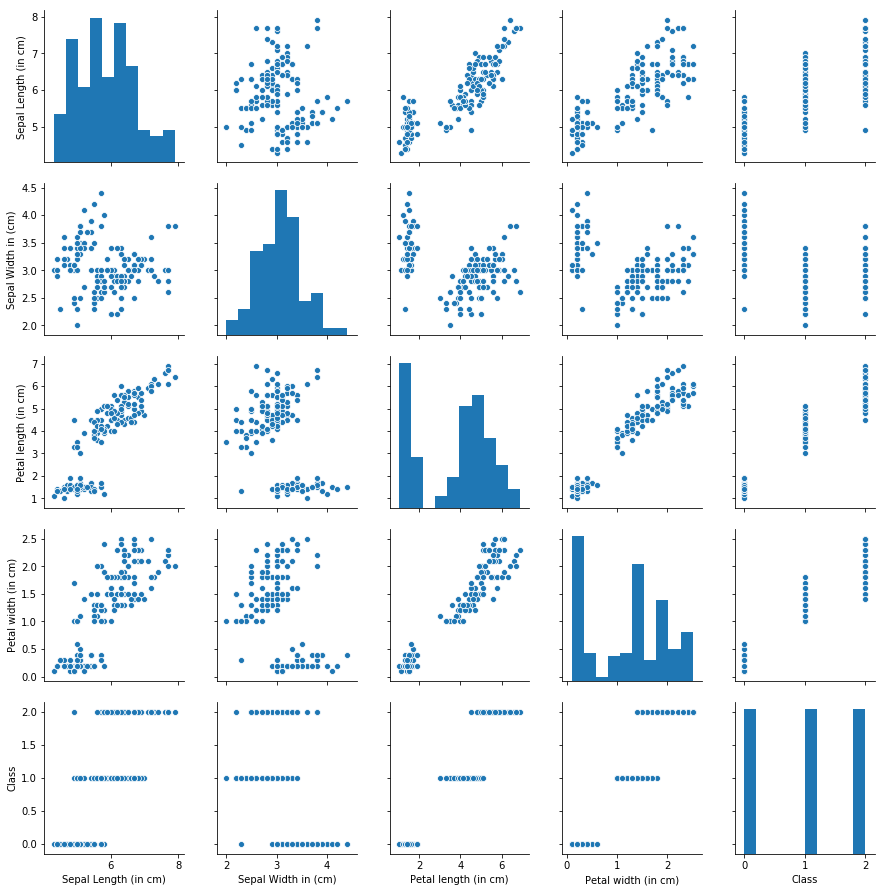

In [27]:
sns.pairplot(Iris_df)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [28]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [29]:
X=Iris_df.drop('Class',axis=1)
y=Iris_df[['Class']]
X = X.apply(zscore)

In [30]:
test_size=0.20
seed=7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [32]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
y_pred=KNN.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(y_pred,y_test))

The accuracy of the KNN is 0.8666666666666667


In [34]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
y_pred=KNN.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(y_pred,y_test))

The accuracy of the KNN is 0.9


In [36]:
KNN=KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [37]:
y_pred=KNN.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(y_pred,y_test))

The accuracy of the KNN is 0.9


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [38]:
k_range=[1,3,5,7,9,11,13,15,17,19]
Scores=[]
MSE=[]
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    Scores.append(metrics.accuracy_score(y_pred,y_test))
    MSE.append(1-metrics.accuracy_score(y_pred,y_test))
print('The accuracy of KNN with different k values are', Scores)
print('The MSE of KNN with different k values are', MSE)

The accuracy of KNN with different k values are [0.9, 0.8666666666666667, 0.9, 0.9333333333333333, 0.9, 0.9, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667]
The MSE of KNN with different k values are [0.09999999999999998, 0.1333333333333333, 0.09999999999999998, 0.06666666666666665, 0.09999999999999998, 0.09999999999999998, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333, 0.1333333333333333]


<span style="color:blue">   *KNN model with k_value = 7 has a least MSE of 0.06665 and has a highest accuracy of 0.9333.*   </span>

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

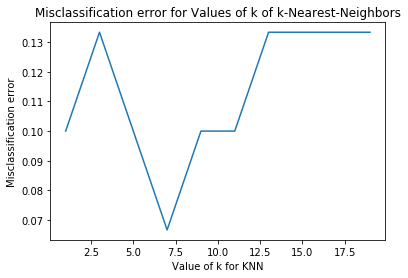

In [39]:
plt.plot(k_range, MSE)
plt.xlabel('Value of k for KNN')
plt.ylabel('Misclassification error')
plt.title('Misclassification error for Values of k of k-Nearest-Neighbors')
plt.show()

# Naive Bayes with Iris Data

In [40]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [42]:
Iris_df=pd.read_csv('Iris.csv')
X=Iris_df.drop('Class',axis=1)
y=Iris_df[['Class']]

In [46]:
#Check the dataset
print(y)
print(X)

              Class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
5       Iris-setosa
6       Iris-setosa
7       Iris-setosa
8       Iris-setosa
9       Iris-setosa
10      Iris-setosa
11      Iris-setosa
12      Iris-setosa
13      Iris-setosa
14      Iris-setosa
15      Iris-setosa
16      Iris-setosa
17      Iris-setosa
18      Iris-setosa
19      Iris-setosa
20      Iris-setosa
21      Iris-setosa
22      Iris-setosa
23      Iris-setosa
24      Iris-setosa
25      Iris-setosa
26      Iris-setosa
27      Iris-setosa
28      Iris-setosa
29      Iris-setosa
..              ...
120  Iris-virginica
121  Iris-virginica
122  Iris-virginica
123  Iris-virginica
124  Iris-virginica
125  Iris-virginica
126  Iris-virginica
127  Iris-virginica
128  Iris-virginica
129  Iris-virginica
130  Iris-virginica
131  Iris-virginica
132  Iris-virginica
133  Iris-virginica
134  Iris-virginica
135  Iris-virginica
136  Iris-virginica
137  Iris-virginica


# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

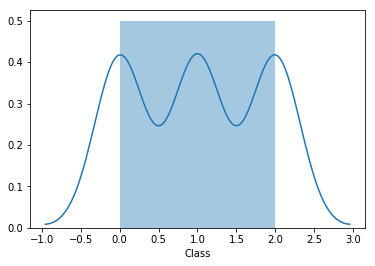

In [65]:
sns.distplot(Iris_df["Class"] )


### Question 12 
Find Correlation among all variables and give your insights 

In [8]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [50]:
Iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


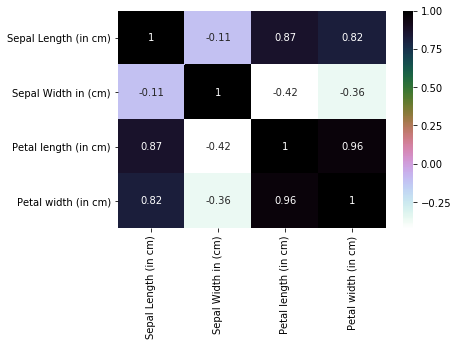

In [51]:
sns.heatmap(Iris_df.corr(),annot=True,cmap='cubehelix_r')

### The Sepal Width and Length are not correlated. The Petal Width and Length are highly correlated.

### Split data in Training and test set in 80:20.

In [52]:
test_size=0.20
seed=7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
le=LabelEncoder()
Iris_df['Class']=le.fit_transform(Iris_df['Class'])

In [55]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(Iris_df.drop('Class',axis=1))
X=scaled_df
Y=Iris_df['Class'].as_matrix()

In [56]:
Iris_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Question 14 
Train and Fit NaiveBayes Model

In [ ]:
#Fit the model

In [57]:
test_size=0.20
seed=7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [58]:
GNB = GaussianNB()

In [59]:
GNB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Predict

In [60]:
y_pred=GNB.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [62]:
print('The accuracy of the GNB is',metrics.accuracy_score(y_pred,y_test))
print('The confusion matrix of the GNB is',metrics.confusion_matrix(y_pred,y_test))

The accuracy of the GNB is 0.8333333333333334
The confusion matrix of the GNB is [[7 0 0]
 [0 9 2]
 [0 3 9]]
